<img src="/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/im/CE434E8C-C0BD-43BD-BF74-EF775724A808.png">
<img src="/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/im/C135484A-2A2D-42BB-B5A5-0CFEA2E22E3D.png">


https://www.cnblogs.com/jpcflyer/p/11069659.html

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jieba
import nltk
import re

In [7]:
file_path = "/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/NLP数据集合/豆瓣电影数据集(2019.3)/豆瓣电影数据集(2019.3).xlsx"
file1 = pd.read_excel(file_path)
textdata = file1.剧情简介.to_list()

In [8]:
file1.head()

,电影名称,评分,评价人数,5星人数,4星人数,3星人数,2星人数,1星人数,短评数量,影评数量,...,制片国家/地区,语言,上映日期,片长,豆瓣网址,官方网址,IMDb链接,宣传海报链接,剧情简介,总分（评分×评价人数）
0,肖申克的救赎 The Shawshank Redemption,9.6,1353097,84.1%,14.1%,1.6%,0.1%,0.1%,265551,7530,...,美国,英语,1994-09-10(多伦多电影节)/1994-10-14(美国),142.0,https://movie.douban.com/subject/1292052/,NaN,http://www.imdb.com/title/tt0111161,https://img3.doubanio.com/view/photo/s_ratio_p...,20世纪40年代末，小有成就的青年银行家安迪（蒂姆·罗宾斯TimRobbins饰）因涉嫌杀害...,12989731.2
1,这个杀手不太冷 Léon,9.4,1226642,74.1%,22.4%,3.3%,0.2%,0.1%,224430,4421,...,法国,英语 / 意大利语 / 法语,1994-09-14(法国),110.0,https://movie.douban.com/subject/1295644/,NaN,http://www.imdb.com/title/tt0110413,https://img3.doubanio.com/view/photo/s_ratio_p...,里昂（让·雷诺饰）是名孤独的职业杀手，受人雇佣。一天，邻居家小姑娘马蒂尔达（纳塔丽·波特曼饰...,11530434.8
2,阿甘正传 Forrest Gump,9.4,1059710,75.5%,21.1%,3.1%,0.2%,0.1%,175071,3847,...,美国,英语,1994-06-23(洛杉矶首映)/1994-07-06(美国),142.0,https://movie.douban.com/subject/1292720/,NaN,http://www.imdb.com/title/tt0109830,https://img1.doubanio.com/view/photo/s_ratio_p...,阿甘（汤姆·汉克斯饰）于二战结束后不久出生在美国南方阿拉巴马州一个闭塞的小镇，他先天弱智，智...,9961274.0
3,盗梦空间 Inception,9.3,1065943,69.7%,25.7%,4.2%,0.3%,0.2%,219175,5372,...,美国 / 英国,英语 / 日语 / 法语,2010-09-01(中国大陆)/2010-07-16(美国),148.0,https://movie.douban.com/subject/3541415/,NaN,http://www.imdb.com/title/tt1375666,https://img3.doubanio.com/view/photo/s_ratio_p...,道姆·柯布（莱昂纳多·迪卡普里奥LeonardoDiCaprio饰）与同事阿瑟（约瑟夫·戈登...,9913269.9
4,霸王别姬,9.6,993975,81.3%,16.2%,2.3%,0.2%,0.1%,214889,6228,...,中国大陆 / 香港,汉语普通话,1993-01-01(香港),171.0,https://movie.douban.com/subject/1291546/,NaN,http://www.imdb.com/title/tt0106332,https://img3.doubanio.com/view/photo/s_ratio_p...,段小楼（张丰毅）与程蝶衣（张国荣）是一对打小一起长大的师兄弟，两人一个演生，一个饰旦，一向配...,9542160.0


In [19]:
# 对句子进行中文分词
def seg_depart(sentence):
    # 对文档中的每一行进行中文分词
    sentence_depart = jieba.cut(sentence.strip())
    return sentence_depart

In [10]:
#删除特殊符号
def remove_digits(input_str):
    punc = u'0123456789.)(）'
    output_str = re.sub(r'[{}]+'.format(punc), '', input_str)
    return output_str

In [12]:
stop_words = [line.strip().decode('utf-8') for line in open('/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/NLP数据集合/停词库/stop_word_for_chinese.txt','rb').readlines()]

In [13]:
# 去除停用词
def remove_stopwords(sentence_list, stopwords_list):
    # 去停用词
    out_list = []
    for word in sentence_list:
        if word not in stopwords_list:
            if not remove_digits(word):
                continue
            elif word != "\t":
                out_list.append(word)
    return out_list

In [17]:
## 完成清理
def clearn(article):
    #加载停用词
    stop_words = [line.strip().decode('utf-8') for line in open('/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/NLP数据集合/停词库/stop_word_for_chinese.txt','rb').readlines()]
    sentence_depart = seg_depart(article)
    sentence_depart = remove_stopwords(sentence_depart, stop_words)
    return sentence_depart

In [15]:
# 转numpy结构
def text_array(article_lists):
    return [np.array(clearn(article)) for article in  article_lists if isinstance(article,(str)) ]

In [20]:
clear_text = text_array(textdata)

Building prefix dict from /usr/local/lib/python3.7/site-packages/jieba/dict.txt ...
Loading model from cache /var/folders/sl/q8x6_03132dfk7rktf00yh880000gn/T/jieba.cache
Loading model cost 1.0486211776733398 seconds.
Prefix dict has been built succesfully.


In [27]:
def drop_2_to_1_dim(mylist): 
    return [i for j in range(len(mylist)) for i in mylist[j]]

## 词频统计

In [24]:
import torch

In [25]:
#特征字典编辑器
def feature_dictionary_editor(word_list):
    feature_dictionary = np.array(list(set(drop_2_to_1_dim(word_list))))
    feature_dim = feature_dictionary.shape[0]
    ones_arr = np.ones_like(feature_dim)
    return feature_dictionary,feature_dim,ones_arr

In [28]:
feature_dictionary,feature_dim,ones_arr = feature_dictionary_editor(clear_text)

In [29]:
def feature_vector(article,feature_dictionary):
    m = len(article)
    ones_arr = np.ones(m)
    return np.array([word==feature_dictionary for word in article]).T.dot(ones_arr)

In [30]:
feature_vector(clear_text[0],feature_dictionary)

array([0., 0., 0., ..., 0., 0., 0.])

654.83

In [36]:
import os
def characteristic_matrix(article_list):
    time = __import__("time")
    start = time.clock()
    feature_dictionary,feature_dim,ones_arr = feature_dictionary_editor(clear_text)
    result = []
    n = len(article_list)
    unit = int(n/100) 
    unit = unit<=0 and 1 or unit
    print(unit)
    t = -1
    for i in range(len(article_list)):
        article = feature_vector(article_list[i],feature_dictionary)
        result.append(article)
        div = i%unit
        if div==0:
            t +=1
            elapsed = (time.clock() - start)
            print("{}{}{}{}{}{}{}{}{}".format("剩余待编码:",str(i/n*100),' %',"目前第",str(i),"次","Time used:",elapsed/100000000000,"秒"))
            if time ==100:
                print('{}{}'.format('剩余数量:',str(n-i)))
    return np.array(result)

In [37]:
code = characteristic_matrix(clear_text[:10])
code

1
剩余待编码:0.0 %目前第0次Time used:3.292176000000012e-11秒
剩余待编码:10.0 %目前第1次Time used:4.295533999999975e-11秒
剩余待编码:20.0 %目前第2次Time used:4.8935900000000174e-11秒
剩余待编码:30.0 %目前第3次Time used:6.473141999999996e-11秒
剩余待编码:40.0 %目前第4次Time used:7.211527999999987e-11秒
剩余待编码:50.0 %目前第5次Time used:8.091504999999983e-11秒
剩余待编码:60.0 %目前第6次Time used:9.649271999999996e-11秒
剩余待编码:70.0 %目前第7次Time used:1.0267579000000012e-10秒
剩余待编码:80.0 %目前第8次Time used:1.1737447999999972e-10秒
剩余待编码:90.0 %目前第9次Time used:1.3347410000000025e-10秒


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
matrix = code 
matrix.shape

(10, 301349)

In [39]:
m,n = matrix.shape

In [40]:
matrix.dot(np.ones(n))

array([ 93.,  57.,  24.,  99.,  37.,  45.,  97.,  28.,  91., 106.])

## 标准TF-IDF

In [31]:
def TF_IDF(docList):
    result = dict()
    m = len(docList)
    WFD1 = 0
    distion_word = set(drop_2_to_1_dim(docList))
    leve1,leve2 = [],[]
    for doc in docList:
        n = len(doc)
        tmpTF = np.array([(doc==word).sum()/n for word in distion_word])
        leve1.append(tmpTF)
        tmpIDF = np.array([word in doc for word in distion_word]).astype(int)
        leve2.append(tmpIDF)
    TF = np.array(leve1)
    count_word = np.array(leve2).T.dot(np.ones(m))
    IDF = np.log(m/(count_word+1))
    return TF*IDF

In [32]:
TF_IDF_matrix = TF_IDF(clear_text[:10])

In [33]:
TF_IDF_matrix[-1].shape,

((562,),)

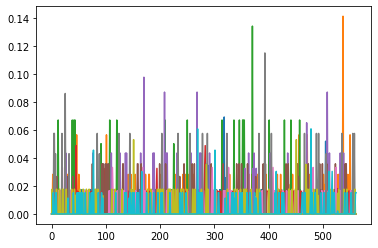

In [34]:
plt.plot(TF_IDF_matrix[:10].T)

# TF-IDF—PNN 魔改版自编码器

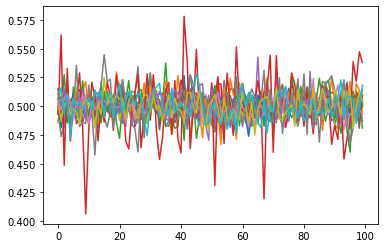

In [41]:
def sigmod(z):
    return 1/(1+np.exp(-z))

def zscore(x):
    return (x-x.mean())/x.std()

def normal_distribution1(x,mu=0,sigma=1):
    return 1/(np.sqrt(2*np.pi) * sigma) * np.exp(-1*((x-mu)**2)/(2*(sigma**2)))

def FN(node,b,theta):
    #print("FN: node",node.shape,"theta",theta.shape,'b:',b)
    node1 = sigmod(np.dot(theta,node)*b)
    #print("FN1: node1",node1.shape,"theta",theta.shape,'b:',b)
    return node1

def TF_IDF_NN(docList):
    result = []
    m = len(docList)
    WFD1 = 0
    distion_word = set(drop_2_to_1_dim(docList))
    leve1,leve2 = [],[]
    np.random.seed(1)
    vector_dim = len(distion_word)
    theta = np.random.randn(vector_dim,100)
    for doc in docList:
        n = len(doc)
        TFlayer = np.array([(doc==word).sum() for word in distion_word])/n
        IDFlayer = 1/(1+np.log(m/np.array([word in doc for word in distion_word]).astype(int)))
        layer0 = TFlayer*IDFlayer
        b = 1-(1/n)*(1/m)
        layer1 = FN(layer0,b,theta.T)
        #print("display2:","layer1:",layer1.shape,"theta:",theta.shape,"b:",b)
        result.append(layer1)       
    return np.array(result)

n = 20
NNV = TF_IDF_NN(clear_text[:n])
plt.plot(NNV.T)
plt.show()
plt.close()

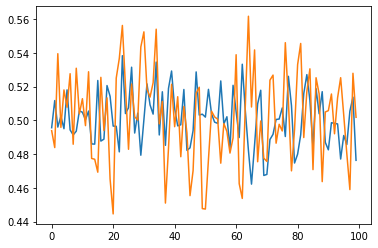

In [42]:
def sigmod(z):
    return 1/(1+np.exp(-z))

def zscore(x):
    return (x-x.mean())/x.std()

def normal_distribution1(x,mu=0,sigma=1):
    return 1/(np.sqrt(2*np.pi) * sigma) * np.exp(-1*((x-mu)**2)/(2*(sigma**2)))

def FN(node,b,theta):
    #print("FN: node",node.shape,"theta",theta.shape,'b:',b)
    node1 = sigmod(np.dot(theta,node)*b)
    #print("FN1: node1",node1.shape,"theta",theta.shape,'b:',b)
    return node1

def TF_IDF_NN(docList):
    result = []
    m = len(docList)
    WFD1 = 0
    distion_word = set(drop_2_to_1_dim(docList))
    leve1,leve2 = [],[]
    np.random.seed(1)
    vector_dim = len(distion_word)
    theta = np.random.randn(vector_dim,100)
    for doc in docList:
        n = len(doc)
        TFlayer = np.array([(doc==word).sum() for word in distion_word])/n
        IDFlayer = 1/(1+np.log(m/np.array([word in doc for word in distion_word]).astype(int)))
        layer0 = TFlayer*IDFlayer
        b = 1-(1/n)*(1/m)
        layer1 = FN(layer0,b,theta.T)
        #print("display2:","layer1:",layer1.shape,"theta:",theta.shape,"b:",b)
        result.append(layer1)       
    return np.array(result)

n = 2
NNV = TF_IDF_NN(clear_text[:n])
plt.plot(NNV.T)
plt.show()
plt.close()

In [28]:
def t(x):
    return x*(1/(5*7))

In [29]:
def t2(x):
    return x*((1/0.5)*(1/0.7))

In [30]:
import matplotlib.pyplot as plt
x = np.random.rand(100)



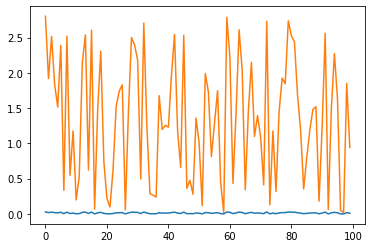

In [31]:
plt.plot(t(x))
plt.plot(t2(x))

In [43]:
sig = lambda z : z/np.exp(z.sum())
plt.plot(sig())
sig(np.arange(100)).sum()

TypeError: <lambda>() missing 1 required positional argument: 'z'

0.6994711428760043

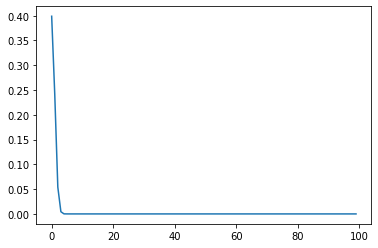

In [33]:
plt.plot(normal_distribution1(np.arange(100)))
normal_distribution1(np.arange(100)).sum()